In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

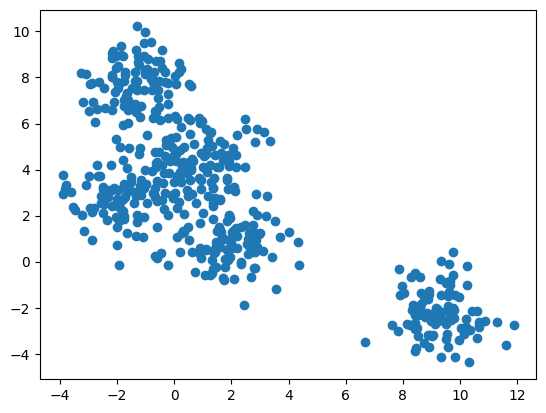

In [3]:
plt.scatter(X, Y)

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [5]:
def Distance(P1, P2):
    return np.sqrt((P1.x - P2.x)**2 + (P1.y - P2.y)**2)

def Mean(AP):
    mean_x = np.mean([p.x for p in AP])
    mean_y = np.mean([p.y for p in AP])
    return Point(mean_x, mean_y)

In [6]:
def MinPoint(P, AP):
    min_dist = float('inf')
    min_index = -1
    for i, centroid in enumerate(AP):
        dist = Distance(P, centroid)
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index

In [7]:
def equality(A1, A2):
    if len(A1) != len(A2):
        return False
    for i in range(len(A1)):
        if A1[i] != A2[i]:
            return False
    return True

In [8]:
def kMeans(X, Y, k):
    # Step 1: Initialize centroids by randomly choosing k points from the dataset
    points = [Point(x, y) for x, y in zip(X, Y)]
    kMi = random.sample(points, k)
    
    # Variables to store the final centroids and the clusters
    kM = kMi
    D = {centroid: [] for centroid in kM}
    
    while True:
        # Step 2: Assign points to the nearest centroid
        D = {centroid: [] for centroid in kM}
        for point in points:
            nearest_centroid = kM[MinPoint(point, kM)]
            D[nearest_centroid].append(point)
        
        # Step 3: Update centroids
        new_kM = []
        for centroid, group in D.items():
            if group:
                new_centroid = Mean(group)
                new_kM.append(new_centroid)
            else:
                new_kM.append(centroid)
        
        # Step 4: Check for convergence
        if np.all([Distance(kM[i], new_kM[i]) < 1e-4 for i in range(k)]):
            break
        kM = new_kM

    return [kM, kMi, D]

In [10]:
# Function to calculate the sum of squared distances to the nearest centroid
def calculate_SSD(points, centroids, clusters):
    ssd = 0
    for centroid, group in clusters.items():
        for point in group:
            ssd += Distance(point, centroid)**2
    return ssd

# Elbow method to determine the optimal k
def Elbow(X, Y):
    points = [Point(x, y) for x, y in zip(X, Y)]
    ssd_values = []
    k_values = range(1, 11)  # Test values from 1 to 10 (or a reasonable value)

    for k in k_values:
        kM, kMi, D = kMeans(X, Y, k)
        ssd = calculate_SSD(points, kM, D)
        ssd_values.append(ssd)
    
    # Plotting the Elbow curve
    plt.plot(k_values, ssd_values, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    return ssd_values

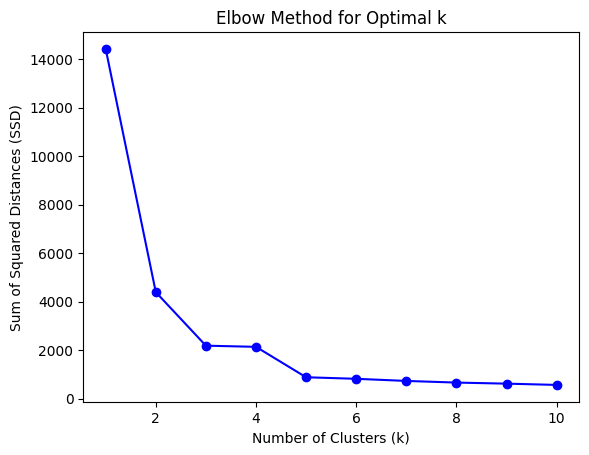

SSD values for different k: [14423.995571116931, 4390.7029778895285, 2183.1288051012775, 2134.8342699350774, 880.3724717289962, 816.6463273356725, 728.8065558682982, 660.8526845961853, 616.9992165650125, 564.1847458669675]


In [11]:
# Plot the Elbow curve for the dataset
ssd_values = Elbow(X, Y)
print("SSD values for different k:", ssd_values)

C:\Users\Arsh\AppData\Local\Temp\ipykernel_20468\1717367003.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid.x, centroid.y, color=final_centroid_color, marker='x', s=200, edgecolor='k', label=f'Final Centroid {i+1}')


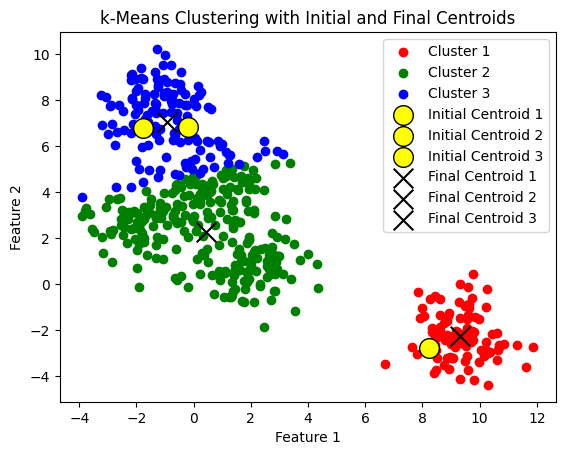

In [17]:
k = 3
kM, kMi, D = kMeans(X, Y, k)

# Plotting the results
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Scatter plot of points color-coded by their cluster
for i, (centroid, points) in enumerate(D.items()):
    plt.scatter([p.x for p in points], [p.y for p in points], color=colors[i % len(colors)], label=f'Cluster {i+1}')

# Plot initial centroids with a distinct color
initial_centroid_color = 'yellow'
for i, centroid in enumerate(kMi):
    plt.scatter(centroid.x, centroid.y, color=initial_centroid_color, marker='o', s=200, edgecolor='k', label=f'Initial Centroid {i+1}')

# Plot final centroids with a distinct color
final_centroid_color = 'black'
for i, centroid in enumerate(kM):
    plt.scatter(centroid.x, centroid.y, color=final_centroid_color, marker='x', s=200, edgecolor='k', label=f'Final Centroid {i+1}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-Means Clustering with Initial and Final Centroids")
plt.legend()
plt.show()